In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X_df = pd.read_csv('data/X_train.csv')
Y_df = pd.read_csv('data/Y_train.csv')

In [3]:
X_df

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,...,False,True,True,False,True,True,False,True,True,True
29996,29997,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,...,True,False,False,False,False,False,False,False,False,False
29997,29998,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,True
29998,29999,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,...,False,True,False,False,False,False,False,False,False,True


In [4]:
Y_df

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0
...,...,...
29995,29996,9500.0
29996,29997,1750.0
29997,29998,1400.0
29998,29999,3700.0


## Count NaN values

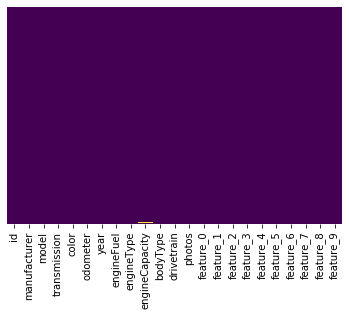

In [5]:
sns.heatmap(X_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
X_df.isnull().sum()

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    9
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

## Delete null rows

In [25]:
X_df[X_df.engineCapacity.isnull()]

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
2371,2372,Nissan,Leaf,automatic,white,50000,2014,electric,electric,NaN,...,False,True,False,False,False,True,False,True,True,False
3431,3432,BMW,i3,automatic,white,54150,2015,electric,electric,NaN,...,False,True,True,True,False,True,True,True,True,True
12191,12192,Fiat,500,automatic,orange,27000,2013,electric,electric,NaN,...,False,True,False,True,True,True,False,True,True,True
13169,13170,Chevrolet,Volt,automatic,silver,168000,2013,electric,electric,NaN,...,False,False,False,True,False,False,False,True,True,True
14863,14864,Nissan,Leaf,automatic,black,84500,2013,electric,electric,NaN,...,False,True,False,True,False,True,True,True,True,True
15094,15095,Fiat,500,automatic,orange,49000,2014,electric,electric,NaN,...,False,False,False,True,False,True,False,True,False,True
26476,26477,Nissan,Leaf,automatic,white,57357,2015,electric,electric,NaN,...,False,True,True,True,True,True,True,True,True,True
27818,27819,BMW,i3,automatic,other,67000,2018,electric,electric,NaN,...,False,True,True,True,True,True,True,True,True,True
29854,29855,Nissan,Leaf,automatic,blue,97400,2011,electric,electric,NaN,...,False,True,False,False,False,False,False,True,False,True


In [28]:
X_df = X_df.drop(X_df[X_df.engineCapacity.isnull()].index)

## Count unique values 

In [7]:
for c in X_df.columns:
    print(c, len(X_df[str(c)].unique()))

id 30000
manufacturer 50
model 992
transmission 2
color 12
odometer 5053
year 49
engineFuel 5
engineType 3
engineCapacity 58
bodyType 12
drivetrain 3
photos 59
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2


## Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

for c in X_df.columns:
    if len(X_df[str(c)].unique()) == 2:
        X_df[str(c)] = LabelEncoder().fit_transform(X_df[str(c)])

In [9]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,0,red,48000,2014,gasoline,gasoline,2.0,...,0,1,0,0,0,1,0,0,1,1
1,2,Mitsubishi,Carisma,1,green,320000,2000,diesel,diesel,1.9,...,0,1,0,0,0,0,0,0,0,0
2,3,Volkswagen,T5,1,white,164000,2011,diesel,diesel,2.0,...,0,1,0,1,0,0,1,1,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,diesel,diesel,2.5,...,0,1,1,0,0,0,0,0,1,1
4,5,Toyota,Camry,0,black,215652,2005,gasoline,gasoline,2.4,...,0,0,0,0,0,0,0,0,0,1


## One hot encoding

In [10]:
columns = X_df.columns
for c in columns:
    c = str(c)
    len_unique = len(X_df[c].unique())
    if len_unique > 2 and len_unique < 10:
        one_hot = pd.get_dummies(X_df[c], drop_first=True)
        X_df = pd.concat([X_df, one_hot], axis=1)
        X_df.drop(c, axis=1, inplace=True)

In [11]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineCapacity,bodyType,photos,...,feature_8,feature_9,electric,gasoline,hybrid-diesel,hybrid-petrol,electric,gasoline,front,rear
0,1,Hyundai,i40,0,red,48000,2014,2.0,sedan,1,...,1,1,0,1,0,0,0,1,1,0
1,2,Mitsubishi,Carisma,1,green,320000,2000,1.9,hatchback,13,...,0,0,0,0,0,0,0,0,1,0
2,3,Volkswagen,T5,1,white,164000,2011,2.0,minibus,14,...,1,0,0,0,0,0,0,0,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,2.5,minibus,1,...,1,1,0,0,0,0,0,0,1,0
4,5,Toyota,Camry,0,black,215652,2005,2.4,sedan,12,...,0,1,0,1,0,0,0,1,1,0


In [12]:
X_df.shape

(30000, 28)

## Drop same features

In [13]:
sames = []

columns = X_df.columns
n = len(columns)
for i in range(n):
    for j in range(i + 1, n):
        if sum(X_df.iloc[:, i] == X_df.iloc[:, j])== X_df.shape[0]:
                sames.append((i, j))
                
sames

[(20, 24)]

In [14]:
column_numbers = list(range(X_df.shape[1]))
for s in sames:
    column_numbers.remove(s[0])
X_df = X_df.iloc[:, column_numbers]

In [15]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineCapacity,bodyType,photos,...,feature_7,feature_8,feature_9,gasoline,hybrid-diesel,hybrid-petrol,electric,gasoline,front,rear
0,1,Hyundai,i40,0,red,48000,2014,2.0,sedan,1,...,0,1,1,1,0,0,0,1,1,0
1,2,Mitsubishi,Carisma,1,green,320000,2000,1.9,hatchback,13,...,0,0,0,0,0,0,0,0,1,0
2,3,Volkswagen,T5,1,white,164000,2011,2.0,minibus,14,...,1,1,0,0,0,0,0,0,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,2.5,minibus,1,...,0,1,1,0,0,0,0,0,1,0
4,5,Toyota,Camry,0,black,215652,2005,2.4,sedan,12,...,0,0,1,1,0,0,0,1,1,0


## Split train-val

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)